In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
%matplotlib inline

In [3]:
from google.colab import files
uploaded = files.upload()

Saving hydrodynamics.csv to hydrodynamics (1).csv
Saving noisysine.csv to noisysine.csv


In [9]:
df = pd.read_csv("noisysine.csv")
X = df.x.values.reshape(-1,1)
y = df.y.values
print(X.shape, y.shape)

(40, 1) (40,)


Для правильного отображения графика нужно задать отдельную последовательность

In [8]:
X_plot = np.linspace(X.min() - 10, X.max() + 10, 500).reshape(-1,1)

Linear and Polynomial

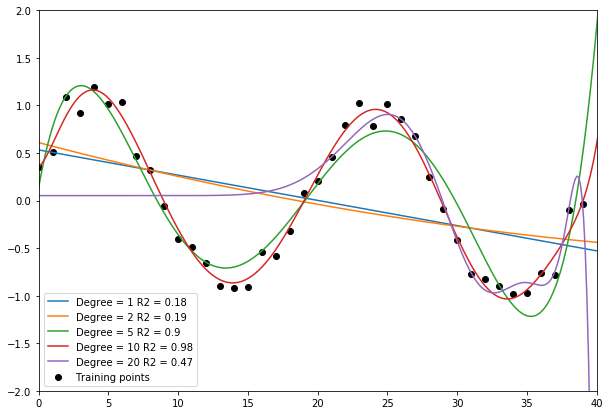

In [9]:
plt.figure(figsize=(10,7))
plt.scatter(X, y, color = "black", label = "Training points")

for degree in [1,2,5,10,20]:
    #создаем pipeline с преобразованием в полиномиальное пространство и регрессией
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    
    model.fit(X,y)
    plt.plot(X_plot, model.predict(X_plot), label = "Degree = " + str(degree) + 
             " R2 = " + str(round(model.score(X,y),2)))

plt.xlim([0, 40])
plt.ylim([-2.0, 2.0])    
plt.legend(loc='lower left')
plt.show()

Trees

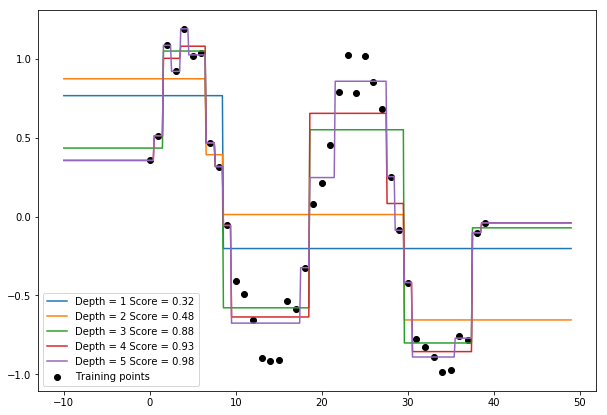

In [0]:
plt.figure(figsize=(10,7))
plt.scatter(X, y, color = "black", label = "Training points")

for depth in range(1,6):
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X,y)
    plt.plot(X_plot, model.predict(X_plot), label = "Depth = " + str(depth) + 
             " Score = " + str(round(model.score(X,y),2)))
    #plt.plot(X, model.predict(X), label = "Depth = " + str(depth) + 
    #         " Score = " + str(round(model.score(X,y),2)))
    
plt.legend(loc='lower left')
plt.show()

# Задание: 

1) Обучите регрессию на датасете hydrodynamics с полиномиальными признаками [2,3,5,10,20] и выведите коэффициент детерминации на тестовой выборке.

2) Обучите гребневую регрессию (Ridge) с коэффициентом \alpha = 0.0001 с теми же вариантами полиномиальных признаков и выведите коэффициент детерминации на тестовой выборке.

3) Обучите лассо регрессию (Lasso) с коэффициентом \alpha = 0.0001 с теми же вариантами полиномиальных признаков. Выведите выведите коэффициент детерминации на тестовой выборке и количество используемых признаков.

In [11]:
df = pd.read_csv("hydrodynamics.csv")
df.head()

,x0,x1,x2,x3,x4,x5,y
0,-2.3,0.568,4.78,3.99,3.17,0.125,0.11
1,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
2,-2.3,0.568,4.78,3.99,3.17,0.175,0.47
3,-2.3,0.568,4.78,3.99,3.17,0.200,0.78
4,-2.3,0.568,4.78,3.99,3.17,0.225,1.18


In [15]:
X = df.drop('y', axis = 1).values
y = df['y'].values
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

(308, 6) (308,)


In [16]:
for degree in [2,3,5,10,20]:
    #создаем pipeline с преобразованием в полиномиальное пространство и регрессией
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    
    model.fit(X_train, y_train)
    print('Degree = ' + str(degree) + '  score = ' + str(round(model.score(X_test,y_test),2)))

Degree = 2  score = 0.85
Degree = 3  score = 0.91
Degree = 5  score = 1.0
Degree = 10  score = 0.98
Degree = 20  score = 0.98


In [19]:
for degree in [2,3,5,10,15]:
    #создаем pipeline с преобразованием в полиномиальное пространство и регрессией
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha = 0.0001))
    
    model.fit(X_train, y_train)
    print('Degree = ' + str(degree) + '  score = ' + str(round(model.score(X_test,y_test),2)))

Degree = 2  score = 0.86
Degree = 3  score = 0.97
Degree = 5  score = 0.99
Degree = 10  score = 0.93


/home/unit-1673/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/unit-1673/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Degree = 15  score = 0.95


In [28]:
for degree in [2,3,5,10,15]:
    #создаем pipeline с преобразованием в полиномиальное пространство и регрессией
    model = make_pipeline(PolynomialFeatures(degree), Lasso(alpha = 0.0001))
    
    model.fit(X_train, y_train)
    print('Degree = ' + str(degree) + '  score = ' + str(round(model.score(X_test,y_test),2)))
    cnt = 0
    for i in model[1].coef_:
        if i == 0:
            cnt += 1
    
    print(len(model[1].coef_) - cnt)
    print()

/home/unit-1673/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1963.949073623617, tolerance: 6.137878233495935
  positive)
/home/unit-1673/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 843.487040063978, tolerance: 6.137878233495935
  positive)
/home/unit-1673/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 239.7697366622874, tolerance: 6.137878233495935
  positive)


Degree = 2  score = 0.88
26

Degree = 3  score = 0.96
82

Degree = 5  score = 0.99
435



/home/unit-1673/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59.522652971499504, tolerance: 6.137878233495935
  positive)


Degree = 10  score = 1.0
7176



/home/unit-1673/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.092739154552913, tolerance: 6.137878233495935
  positive)


Degree = 15  score = 1.0
48018

